# Lab 5. Fuzzy Systems
# Task 5.2 Project Risk Assessment
## Problem Descriptions
Describe the problem here...
## Problem Descriptions
Build a Fuzzy systems to measure Project Risk Assesment using  two key piece of data:    
1.   Project Funding.
2.   Staffing.

### Linguistic Variables
We have 3 liguititc variabel(the first 2 are inputs and the last is an output): 

    *  Funding:  Inadequate, Marginal, Adequate.
    *  Staffing:  Small, Large.
    *  Risk:  Low, Normal, High

### Mebership Function
    *  Funding(range 0 - 100) :    
        *  A1 - Inadequate{1.0/0, 1/30, 0.5/35, 0/45, 0/80, 0/100}. 
        *  A2 - Marginal{0/0, 0/20, 0/30, 0.2/35, 1/50, 0/70, 0/100}. 
        *  A3 - Adequate{0/0, 0/20, 0/55, 1/70, 1/100, 1/100}.
    *  Staffing(range 0 - 100) :    
        *  B1 - Small{1.0/0, 1/20, 1/25, 0/65, 0/80, 0/100} 
        *  B2 - Large{0/0, 0/20, 0/35, 1/75, 1/75, 1/75}
    *  Risk(range 0 - 100) percent :    
        *  C1 - Low{1.0/0, 1/20, 0/40, 0/60, 0/80, 0/100}.
        *  C2 - Normal{0/0, 0/25, 1/45, 1/50, 0/75, 0/100}.
        *  C3 - High{0/0, 0/20, 0/40, 0/60, 1/80, 1/100}.


### Rules (Model Assessment)    
    Rule 1:
        *  IF      project funding is Adequate - x is A3
        *  OR      project staffing is Small- y is B1
        *  THEN    the Risk is Low - z is C1
    Rule 2:    
        *  IF      project funding is Marginal - x is A2
        *  AND     Project staffing was Large - y is B2
        *  THEN    the Risk is Normal - z is C2
    Rule:    
        *  IF      project funding is Inadequate - x is A1
        *  THEN    the Risk is High - z is C1
        



## Implementation and Results
### Plan of attack
Using the Mamdani inference system we will:     
*  Fuzzyfication of input Vaiables.
*  Rule evaluation.
*  Aggregation of rule outputs.
*  Defuzzyfication.

In [1]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

     |████████████████████████████████| 993 kB 5.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=88d1d2e4026163eeae6180698bc65b58f6bcf0e44eb05491b516f280f607d7c8
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


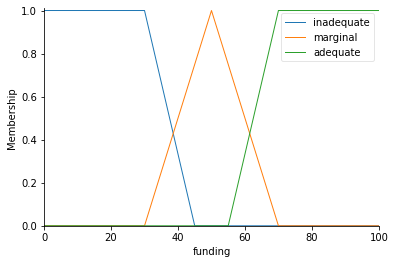

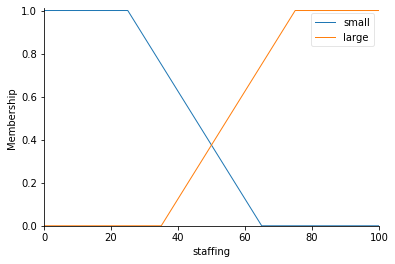

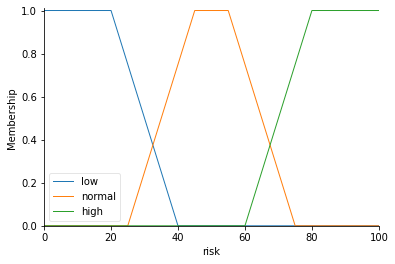

In [2]:
# Linguistic variables for antecedents/consequent
funding = ctrl.Antecedent(np.arange(0, 101, 1), 'funding')
staffing = ctrl.Antecedent(np.arange(0, 101, 1), 'staffing')
risk = ctrl.Consequent(np.arange(0, 101, 1), 'risk')

# membership functions for each linguistic values
funding['inadequate'] = fuzz.trapmf(funding.universe, [0, 0, 30, 45])
funding['marginal'] = fuzz.trimf(funding.universe, [30, 50, 70])
funding['adequate'] = fuzz.trapmf(funding.universe, [55, 70, 100, 100])
staffing['small'] = fuzz.trapmf(staffing.universe, [0, 0, 25, 65])
staffing['large'] = fuzz.trapmf(staffing.universe, [35, 75, 100, 100])
risk['low'] = fuzz.trapmf(risk.universe, [0, 0, 20, 40])
risk['normal'] = fuzz.trapmf(risk.universe, [25, 45, 55, 75])
risk['high'] = fuzz.trapmf(risk.universe, [60, 80, 100, 100])

funding.view()
staffing.view()
risk.view()

In [3]:
# Define the rules
rule1 = ctrl.Rule(funding['adequate'] | staffing['small'], risk['low'])
rule2 = ctrl.Rule(funding['marginal'] & staffing['large'], risk['normal'])
rule3 = ctrl.Rule(funding['inadequate'], risk['high'])
# rule4 = ctrl.Rule(funding['inadequate'] & staffing['large'], risk['high'])

# Create the control system and its simulation
ctrl_sys = ctrl.ControlSystem([rule1, rule2, rule3])
# ctrl_sys = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
ctrl_sim = ctrl.ControlSystemSimulation(ctrl_sys)

Project risk: 66.66529281135837 %


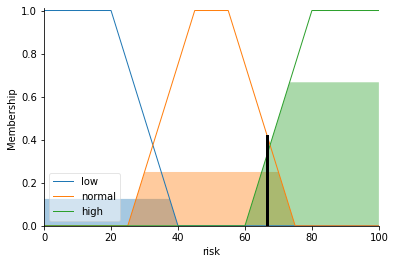

In [4]:
# Pass inputs to the ControlSystem 
ctrl_sim.inputs({'funding': 35, 'staffing': 60})

# Crunch the numbers
ctrl_sim.compute()
print("Project risk:", ctrl_sim.output['risk'], "%")
risk.view(sim=ctrl_sim)


In [5]:
# Define the rules
rule1 = ctrl.Rule(funding['adequate'] | staffing['small'], risk['low'])
rule2 = ctrl.Rule(funding['inadequate'] & staffing['large'], risk['high'])
rule3 = ctrl.Rule(funding['inadequate'], risk['high'])
# rule4 = ctrl.Rule(funding['inadequate'] & staffing['large'], risk['high'])

# Create the control system and its simulation
ctrl_sys = ctrl.ControlSystem([rule1, rule2, rule3])
# ctrl_sys = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
ctrl_sim = ctrl.ControlSystemSimulation(ctrl_sys)

Project risk: 71.70604376024514 %


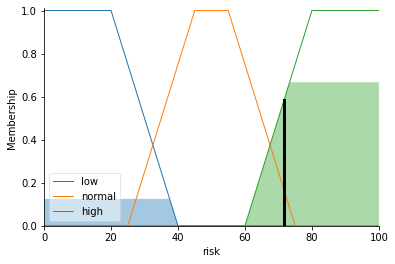

In [6]:
# Pass inputs to the ControlSystem 
ctrl_sim.inputs({'funding': 35, 'staffing': 60})

# Crunch the numbers
ctrl_sim.compute()
print("Project risk:", ctrl_sim.output['risk'], "%")
risk.view(sim=ctrl_sim)

## Discussions

In this task, In this task, we evaluated the antecedents and applied the results of the consequent(min and scaling). Note, figures lifted from the graph is a visual esimation.  Having inputs values:

Staffing = 60%, meu(y = B1) = 0.1, meu(y = B2) = 0.7.
Funding = 35%, meu(x = A1) = 0.5, meu(x = A2) = 0.2, meu(x = A3) = 0.0

Rule evaluation in the first instance -

1.  Rule 1:
    *  If x is A3(0.0) or y is B1(0.1) THEN(max) C1 = 0.1
2.  Rule 2:
    *  IF x is A(0.2) and y is B2(0.7) THEN(min) C2 = 0.2
3.  Rule 3:
    *  IF x is A1(0.5) THEN C3 = 0.5

COG = (0 + 20 + 30)0.1 + (30 + 40 + 50 + 60)0.2 + (70 + 80 + 90 + 100)0.5/ 0.1 + 0.1 + 0.1 + 0.2 + 0.2 + 0.2 + 0.2 + 0.5 + 0.5 + 0.5 +0.5 = 209/3.1 = 67.419%

Rule Evaluation for second condition - 

1.  Rule 1:
    *  If x is A3(0.0) or y is B1(0.1) THEN(max) C1 = 0.1
2.  Rule 2:
    *  IF x is A1(0.5) and y is B2(0.7) THEN(min) C2 = 0.5
3.  Rule 3:
    *  IF x is A1(0.5) THEN C3 = 0.5

COG = (0 + 20 + 30)0.1 + (70, 80, 90, 100)0.50.1 + 0.1 + 0.1 + 0.5 + 0.5 + 0.5 + 0.5 + 0.5 + 0.5 + 0.5 + 0.5 = 343/4.3 = 79.767%

The manual calculations for both models were very close sugeesting that the models are in fact accurate.  Also comparing the results between the diffrent models that used the same inut values but different rules showed different outputs.  The second model had a higher Risk associated with it.  From this we can say that it is clear that the input values are not the only thing that impacts the output.  The rules are necessary elements that should be included in the final results.  Unlike the where ou have an input value and a resltant output, the fuzzy system describes the situaltional circumastance better by adding in the fuzzy logic aspect to give a more accurate result.  


